In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [7]:
iris=load_iris()
X= iris.data
y=iris.target

In [12]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2, random_state=42)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
from sklearn.metrics import accuracy_score

predictions= knn.predict(X_test)

accuracy= accuracy_score(y_test, predictions)
print(f"The model's accuracy is: {accuracy * 100}%")

The model's accuracy is: 100.0%


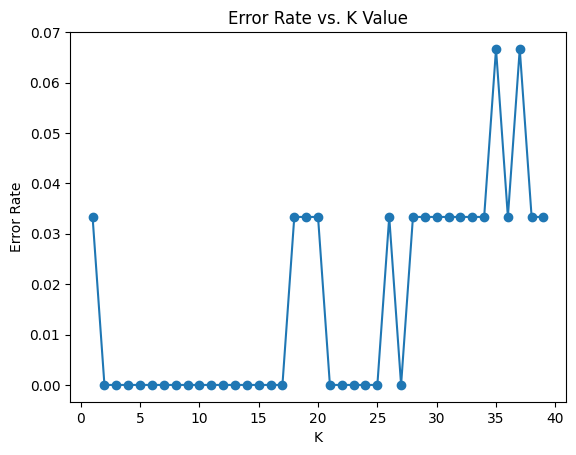

In [19]:
import matplotlib.pyplot as plt
error_rate=[]

for i in range(1, 40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 40), error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [20]:
new_flower=[[5.1, 3.5, 1.4, 0.2]]
new_flower_scaled= scaler.transform(new_flower)
prediction=knn.predict(new_flower_scaled)
species_names=iris.target_names
result=species_names[prediction[0]]

print(f'The model predicts this flower is a: {result}')

The model predicts this flower is a: setosa


In [21]:
distances, indices= knn.kneighbors(new_flower_scaled)
print('The 5 closest neighbots are at these indices in the training set:')
print(indices)

The 5 closest neighbots are at these indices in the training set:
[[ 23  71   7  27  35   8  26  57 102   3 114  51  31  94  98  58  14  33
   75   0  84  52  28  78  38  55  13  48   4  70  32 104   9  72 117  67
   66  41   1]]


In [22]:
import joblib

joblib.dump(knn, 'Iris_Flower_with_KNN_Project.pkl')


['Iris_Flower_with_KNN_Project.pkl']